<a href="https://colab.research.google.com/github/ravi-gopalan/predicting_pneumonia/blob/master/chest_xray_predictions_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create/Manipulate Directories for Image Processing and Download Input Data

In [1]:
!ls -la

total 16
drwxr-xr-x 1 root root 4096 May 22 16:22 .
drwxr-xr-x 1 root root 4096 May 28 00:56 ..
drwxr-xr-x 1 root root 4096 May 23 16:08 .config
drwxr-xr-x 1 root root 4096 May 22 16:22 sample_data


Create 2 folders within the /content folder '.kaggle' and 'capstone'

In [2]:
!cd /content
!mkdir .kaggle
!mkdir capstone
!ls -la

total 24
drwxr-xr-x 1 root root 4096 May 28 01:00 .
drwxr-xr-x 1 root root 4096 May 28 00:56 ..
drwxr-xr-x 2 root root 4096 May 28 01:00 capstone
drwxr-xr-x 1 root root 4096 May 23 16:08 .config
drwxr-xr-x 2 root root 4096 May 28 01:00 .kaggle
drwxr-xr-x 1 root root 4096 May 22 16:22 sample_data


Create the kaggle.json file using the API token. This will help download the data directly from Kaggle dataset

In [0]:
import json
token = {"username":"ravijee","key":"e4042f800aaee606f244555554f6fd8e"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [4]:
cd /root

/root


Create a .kaggle folder within the root directory and copy the contents of the kaggle.json.
Change the permissions of the file

In [0]:

!mkdir .kaggle
    
!cp /content/.kaggle/kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

Download Data from Kaggle website through API. Data gets downloaded as chest-xray-pneumonia.zip

---
Unzip the file. This then creates a folder called chest_xray.zip  

---

Unzip the chest_xray.zip file, which then creates a directory called chest_xray and subdirectories containing train, val and test subdirectories as well as a __MACOSX folder

---

Remove the __MACOSX folder


In [14]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia -p /content
!unzip /content/chest-xray-pneumonia.zip
!cd /content

!unzip /content/chest_xray.zip
!ls -la

 99% 1.14G/1.15G [00:07<00:00, 201MB/s]
100% 1.15G/1.15G [00:07<00:00, 167MB/s]
Archive:  /content/chest-xray-pneumonia.zip
  inflating: chest_xray.zip          
Archive:  /content/chest_xray.zip
   creating: chest_xray/
  inflating: chest_xray/.DS_Store    
   creating: __MACOSX/
   creating: __MACOSX/chest_xray/
  inflating: __MACOSX/chest_xray/._.DS_Store  
   creating: chest_xray/test/
  inflating: chest_xray/test/.DS_Store  
   creating: __MACOSX/chest_xray/test/
  inflating: __MACOSX/chest_xray/test/._.DS_Store  
   creating: chest_xray/test/PNEUMONIA/
  inflating: chest_xray/test/PNEUMONIA/person147_bacteria_706.jpeg  
   creating: __MACOSX/chest_xray/test/PNEUMONIA/
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person147_bacteria_706.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person100_bacteria_482.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person78_bacteria_382.jpeg  
  inflating: __MACOS

In [0]:
!rm /content/chest-xray-pneumonia.zip
!rm /content/chest_xray.zip
!cd /content/chest_xray
!rm -r __MACOSX

Pre-processing

---

The data file has multiple directories anf files names '.DS_Store'.
Remove all files and directories named '.DS_Store' as they will cause issues in our processing

In [0]:
!cd /content/chest_xray
!find -type d -name .DS_Store -exec ls -a {} \;
!find -type d -name .DS_Store -exec rm -rf {} \;
!find -name .DS_Store -exec rm -rf {} \;

!cd /content/chest_xray
!find -type d -name .DS_Store -exec ls -a {} \;
!find -name .DS_Store -exec ls -a {} \;


**Following libraries are required for this project**
File & Directory Manipulation:** os, pathlib (Path), shutil, glob
---
Image Manipulation:** PIL (Image & ImageFIle)
---

Data Visualizations:** matplotlib.pyplot, matplotlib.gridspec, seaborn
---
Arrays & DataFrames**: numpy, pandas
---
Balancing Datasets:** imblearn.under_sampling, imblearn.over_sampling
---
Deep Learning:** keras.layers, keras.callbacks, keras.models, keras.applications
---
Data Preprocessing:** keras.preprocessing
---
Model metrics:** sklearn.metrics
---
Other utility libraries: sklearn.datasets, keras.utils, tqdm
---











In [0]:
import os
from pathlib import Path
import shutil
import glob
from PIL import Image, ImageFile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns


from sklearn.datasets import load_files
from keras.utils import np_utils

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


from tqdm import tqdm


from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential, Model
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping, History, CSVLogger
from keras.applications import vgg16, inception_v3, resnet50, mobilenet, xception

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import f1_score, fbeta_score, roc_curve, cohen_kappa_score
from sklearn.metrics import auc, roc_auc_score, precision_recall_curve 



In [21]:
os.chdir('/content/chest_xray')
!ls -la
!mkdir saved_models
!ls -la


total 20
drwxr-xr-x 5 root root 4096 May 28 01:16 .
drwxr-xr-x 1 root root 4096 May 28 01:15 ..
drwxr-xr-x 4 root root 4096 May 28 01:16 test
drwxr-xr-x 4 root root 4096 May 28 01:16 train
drwxr-xr-x 4 root root 4096 May 28 01:16 val
total 24
drwxr-xr-x 6 root root 4096 May 28 01:29 .
drwxr-xr-x 1 root root 4096 May 28 01:15 ..
drwxr-xr-x 2 root root 4096 May 28 01:29 saved_models
drwxr-xr-x 4 root root 4096 May 28 01:16 test
drwxr-xr-x 4 root root 4096 May 28 01:16 train
drwxr-xr-x 4 root root 4096 May 28 01:16 val


Load Google Drive to  load and retrieve model files

In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [23]:
!ls -la

total 24
drwxr-xr-x 6 root root 4096 May 28 01:29 .
drwxr-xr-x 1 root root 4096 May 28 01:31 ..
drwxr-xr-x 2 root root 4096 May 28 01:29 saved_models
drwxr-xr-x 4 root root 4096 May 28 01:16 test
drwxr-xr-x 4 root root 4096 May 28 01:16 train
drwxr-xr-x 4 root root 4096 May 28 01:16 val


In [0]:
# Ensure results are reproducible
# Set the seed for hash based operations in python
os.environ['PYTHONHASHSEED'] = '0'

seed=42

# Set the numpy seed
np.random.seed(seed)

Create variables to get the image files from the path 

In [25]:
# data path
data_dir = Path('/content/chest_xray')

# path to directory containing train set
train_dir = data_dir / 'train'

# path to directory containing validation set
val_dir = data_dir / 'val'

# path to the directory containing test set
test_dir = data_dir / 'test'

type(data_dir)

pathlib.PosixPath

Create a helper function 'load_dataset(path)' that takes in a path argument,loads the files and creates a tuple of the filenames showing the filenames and the target( 1 for Normal and 0 for Pneumonia)

In [0]:
# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    xray_files = np.array(data['filenames'])
    xray_targets = np_utils.to_categorical(np.array(data['target']), 2)
    return xray_files, xray_targets

  
  
# load train, test, and validation datasets
train_files, train_targets = load_dataset(train_dir)
valid_files, valid_targets = load_dataset(val_dir)
test_files, test_targets = load_dataset(test_dir)


Provide a summary of the input data and their classification

In [27]:
print('There are %s total x_ray images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training x_ray images.' % len(train_files))
print('There are %d validation x_ray images.' % len(valid_files))
print('There are %d test x_ray images.'% len(test_files))

print('Total cases in the train set: {}'.format(train_targets.shape[0]))
print('Normal cases in the train set: {}'.format(np.count_nonzero(train_targets,axis=0)[0]))
print('% of Normal cases in the train set: {:.1%}'.format(np.count_nonzero(train_targets,axis=0)[0]/train_targets.shape[0]))

print('Total cases in the validation set: {}'.format(valid_targets.shape[0]))
print('Normal cases in the validation set: {}'.format(np.count_nonzero(valid_targets,axis=0)[0]))
print('% of Normal cases in the validation set: {:.1%}'.format(np.count_nonzero(valid_targets,axis=0)[0]/valid_targets.shape[0]))

print('Total cases in the test set: {}'.format(test_targets.shape[0]))
print('Normal cases in the test set: {}'.format(np.count_nonzero(test_targets,axis=0)[0]))
print('% of Normal cases in the test set: {:.1%}'.format(np.count_nonzero(test_targets,axis=0)[0]/test_targets.shape[0]))

There are 5856 total x_ray images.

There are 5216 training x_ray images.
There are 16 validation x_ray images.
There are 624 test x_ray images.
Total cases in the train set: 5216
Normal cases in the train set: 1341
% of Normal cases in the train set: 25.7%
Total cases in the validation set: 16
Normal cases in the validation set: 8
% of Normal cases in the validation set: 50.0%
Total cases in the test set: 624
Normal cases in the test set: 234
% of Normal cases in the test set: 37.5%


Insert a graphic representation of the distribution of the input data

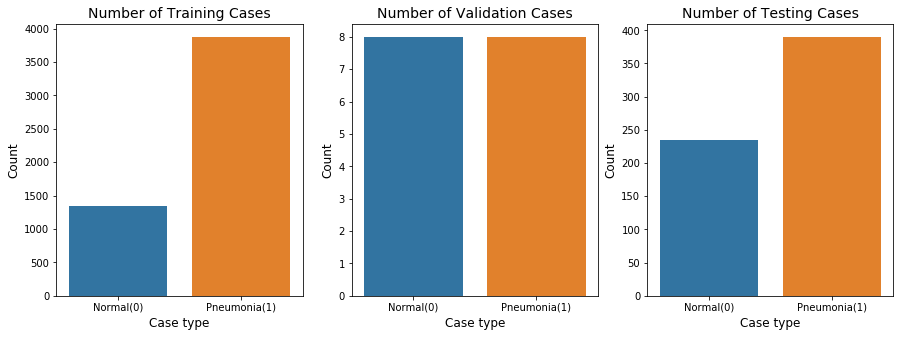

In [29]:

# Get the counts for each class
df_train = pd.DataFrame({'Pneumonia':train_targets[:,1]})
training_count = df_train['Pneumonia'].value_counts()

df_valid = pd.DataFrame({'Pneumonia':valid_targets[:,1]})
validation_count = df_valid['Pneumonia'].value_counts()

df_test = pd.DataFrame({'Pneumonia':test_targets[:,1]})
testing_count = df_test['Pneumonia'].value_counts()

# Plot the results 

plt.show()


%matplotlib inline

fig_x = plt.figure(figsize=(15,5))
gs_x = gridspec.GridSpec(1, 3)


ax1 = plt.subplot(gs_x[0, 0])
ax1 = sns.barplot(x=training_count.index, y= training_count.values)
ax1 = plt.title('Number of Training Cases', fontsize=14)
ax1 = plt.xlabel('Case type', fontsize=12)
ax1 = plt.ylabel('Count', fontsize=12)
ax1 = plt.xticks(range(len(training_count.index)), ['Normal(0)', 'Pneumonia(1)'])




ax2 = plt.subplot(gs_x[0, 1])
ax2 = sns.barplot(x=validation_count.index, y= validation_count.values)
ax2 = plt.title('Number of Validation Cases', fontsize=14)
ax2 = plt.xlabel('Case type', fontsize=12)
ax2 = plt.ylabel('Count', fontsize=12)
ax2 = plt.xticks(range(len(validation_count.index)), ['Normal(0)', 'Pneumonia(1)'])





ax3 = plt.subplot(gs_x[0, 2])
ax3 = sns.barplot(x=testing_count.index, y= testing_count.values)
ax3 = plt.title('Number of Testing Cases', fontsize=14)
ax3 = plt.xlabel('Case type', fontsize=12)
ax3 = plt.ylabel('Count', fontsize=12)
ax3 = plt.xticks(range(len(testing_count.index)), ['Normal(0)', 'Pneumonia(1)'])

# show the plot


plt.savefig('saved_models/raw_data_distribution.jpeg')
plt.show()

The training data set is unbalanced with normal cases at ~25% and ~75% of pneumonia cases that may bias our learning algorithm and hence will need to be balanced

In [0]:
rus = RandomUnderSampler(ratio='majority',random_state=42)
train_files_rebalanced, train_targets_rebalanced = rus.fit_sample(train_files.reshape(-1,1), train_targets)

In [31]:
print('Total cases in the undersampled train set: {}'.format(train_targets_rebalanced.shape[0]))
print('Normal cases in the undersampled train set: {}'.format(np.count_nonzero(train_targets_rebalanced,axis=0)[0]))
print('% of Normal cases in the undersampled train set: {:.1%}'.format(np.count_nonzero(train_targets_rebalanced,axis=0)[0]/train_targets_rebalanced.shape[0]))

Total cases in the undersampled train set: 2682
Normal cases in the undersampled train set: 1341
% of Normal cases in the undersampled train set: 50.0%


In [0]:
# create a helper function to determine the label of the case from the name of the image
def normal_or_pneumonia(name):
  if name.__contains__('NORMAL'):
    case = 'Normal'
  else:
    case = 'Pneumonia'
  return case

Find the number of different sizes of images. There are 4366 different image sizes in the training set comprising 5216 images. This will need to be resized to a standard size to ensure the algorithm learns

In [33]:
image_sizes = []
for pic in range(len(train_files)):
  image_sizes.append(image.load_img(np.squeeze(train_files,axis=None)[pic]).size)  
df_image_sizes = pd.DataFrame(image_sizes, columns=['first','second'])
df_image_sizes['size'] = '('+df_image_sizes['first'].map(str)+','+df_image_sizes['second'].map(str)+')'
df_image_sizes['size'].nunique()

4366

Create a visual representation of some random x-rays showing normal and pneumonia afflicted lungs to see how they are different

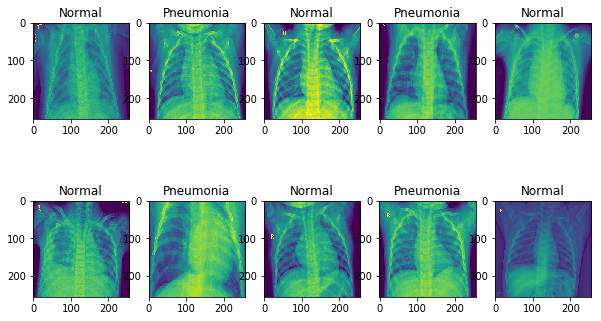

'/content/gdrive/My Drive/Colab_stuff/saved_models/sample_images.jpeg'

<Figure size 432x288 with 0 Axes>

In [34]:
%matplotlib inline

grid_height = 2
grid_width = 5

fig_b = plt.figure(figsize=(10,6))
gs_b = gridspec.GridSpec(grid_height, grid_width)

np.random.randint(0,2682)
[image.load_img(np.squeeze(train_files_rebalanced,axis=None)[np.random.randint(0,2682)], target_size=(256, 256)),\
                         normal_or_pneumonia(np.squeeze(train_files_rebalanced,axis=None)[np.random.randint(0,2682)])]

for row in range(grid_height):
  for col in range(grid_width):
    plt.subplot(gs_b[row, col])
    plt.title(normal_or_pneumonia(np.squeeze(train_files_rebalanced,axis=None)[np.random.randint(0,2682)]))
    plt.imshow(image.load_img(np.squeeze(train_files_rebalanced,axis=None)[np.random.randint(0,2682)], target_size=(256, 256)).convert('L'))

plt.show()
plt.savefig('saved_models/sample_images.jpeg')
shutil.copy('saved_models/sample_images.jpeg','/content/gdrive/My Drive/Colab_stuff/saved_models/')

Tensor for the CNN
Here an image is resized to a target size, numpy array which is then converted to a 3D tensor. This 3D tensor is then converted to a 4D tensor consisting of the number of samples and each image tensor to be fed into the neural network 

In [0]:

# create a 4D tensor from an imaoge
def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(256, 256))
    # convert PIL.Image.Image type to 3D tensor with shape (256, 256, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 256, 256, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

# take multiple images and convert them into tensors
def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)
  
  


Load all the images and create the tensor for processing

In [36]:
ImageFile.LOAD_TRUNCATED_IMAGES = True             

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255
train_tensors_rebalanced = paths_to_tensor(np.squeeze(train_files_rebalanced)).astype('float32')/255


100%|██████████| 2682/2682 [00:55<00:00, 48.54it/s]


# Create the Deep Learning Models starting with a benchmark baseline model

Benchmark Model - 1 layer CNN
Create a benchmark model to establish baseline metrics

In [37]:
benchmark_model = Sequential()

benchmark_model.add(Conv2D(filters=8, kernel_size=2, padding='valid', activation='relu',input_shape=(256,256,3)))
benchmark_model.add(GlobalAveragePooling2D())
benchmark_model.add(Dense(2, activation='softmax'))

  
benchmark_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 255, 255, 8)       104       
_________________________________________________________________
global_average_pooling2d_1 ( (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


Augment images by including some random rotations, shifts etc so that the model can learn better

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,vertical_flip = True)

Create a helper function to create a base 4 layer CNN model

In [0]:
def create_base_CNN_model(filter_number = 16, kernel_size = 2, padding = 'valid', \
                     activation = 'relu', input_shape = (256, 256, 3), dropout_rate = 0.2, \
                     pool_size=2, final_activation = 'softmax'):
  base_cnn_model = Sequential()

  base_cnn_model.add(Conv2D(filters=filter_number, kernel_size=kernel_size, padding=padding, activation=activation,input_shape=input_shape))
  base_cnn_model.add(MaxPooling2D(pool_size))
  base_cnn_model.add(Dropout(dropout_rate))
  base_cnn_model.add(BatchNormalization())
            
            
  return base_cnn_model

Create a helper function to generate various metrics to determine model performance

In [0]:
def report_metrics(model, t_tensors, t_targets):
  # get the predictions for the test set
  predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in t_tensors]
  pred_categorical = np_utils.to_categorical(predictions,2)
  # calculate metrics
  report_accuracy = 100*np.sum(np.array(predictions)==np.argmax(t_targets, axis=1))/len(predictions)
  report_conf_matrix = confusion_matrix(t_targets.argmax(axis=1),pred_categorical.argmax(axis=1))
  report_cohens_kappa = cohen_kappa_score(t_targets.argmax(axis=1),pred_categorical.argmax(axis=1))
  report_precision_rate = precision_score(t_targets.argmax(axis=1),pred_categorical.argmax(axis=1))
  report_recall_rate = recall_score(t_targets.argmax(axis=1),pred_categorical.argmax(axis=1))
  
  report_f1 = f1_score(t_targets.argmax(axis=1),pred_categorical.argmax(axis=1))
  report_fbeta_2 = fbeta_score(t_targets.argmax(axis=1),pred_categorical.argmax(axis=1),beta=2)
  # calculate precision-recall curve
  report_precision, report_recall, report_PRC_thresholds = precision_recall_curve(t_targets.argmax(axis=1), pred_categorical.argmax(axis=1))
  report_AUC = auc(report_recall, report_precision)
  # calculate roc curve
  report_fpr, report_tpr, report_ROC_thresholds = roc_curve(t_targets.argmax(axis=1), pred_categorical.argmax(axis=1), pos_label=1)
  report_ROC_AUC = roc_auc_score(t_targets.argmax(axis=1), pred_categorical.argmax(axis=1))
  report_output = {'accuracy':report_accuracy,\
            'confusion_matrix': report_conf_matrix,\
            'kappa_score': report_cohens_kappa,\
            'precision': report_precision_rate,\
            'recall': report_recall_rate,\
            'f1': report_f1,\
            'fbeta_2': report_fbeta_2,\
            'PRC_precision': report_precision,\
            'PRC_recall': report_recall,\
            'PRC_thresholds': report_PRC_thresholds,\
            'AUC': report_AUC,\
            'fpr': report_fpr,\
            'tpr': report_tpr,\
            'ROC_thresholds': report_ROC_thresholds,\
            'ROC_AUC': report_ROC_AUC}
  return report_output

Create a helper function to be able to take a model, and run it for a specific set of training and validation sets.
This function also ensures storing best models through a checkpoint, and the training history logged into  file
This function also compiles the models and trains them for an augmented data set after random operations such as lateral shifts/rotations/flips.
It returns the training and model metrics

In [0]:
def run_cnn_model(model, chkpoint_filepath, csv_filepath, \
                  tr_tensors, tr_targets, \
                  v_tensors, v_targets, \
                  te_tensors, te_targets, \
                  batch = 32, epochs = 1, es_patience=5):
  
  early_stop_monitor = EarlyStopping(monitor='val_loss', patience=es_patience, mode='min')
  checkpoint = ModelCheckpoint(filepath=chkpoint_filepath)
  csv_log = CSVLogger(csv_filepath, separator=',', append=False)
  
  model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
  
  model_train = model.fit_generator(datagen.flow(tr_tensors, tr_targets,batch_size=batch),steps_per_epoch=len(tr_tensors)/batch, epochs=epochs,\
                              validation_data=(v_tensors, v_targets), verbose=1, \
                              callbacks=[early_stop_monitor, checkpoint, csv_log])
  
  model.load_weights(chkpoint_filepath)
  report_model = report_metrics(model, te_tensors, te_targets)
              
  
  return model_train, report_model



In [42]:
# Run benchmark model and obtain results
benchmark_train, benchmark_report = run_cnn_model(model=benchmark_model,\
                                                  chkpoint_filepath='saved_models/benchmark.hdf5',\
                                                  csv_filepath='saved_models/benchmark_train.log',\
                                                  tr_tensors=train_tensors, tr_targets=train_targets,\
                                                  v_tensors=valid_tensors, v_targets=valid_targets,\
                                                  te_tensors=test_tensors,te_targets=test_targets,\
                                                  batch=32, epochs=1, es_patience=1
                                                 )



print('Benchmark Model: \n {}'.format(benchmark_report))  

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
163/163 [==============================] - 66s 402ms/step - loss: 0.5683 - acc: 0.7429 - val_loss: 0.8243 - val_acc: 0.5000
Benchmark Model: 
 {'accuracy': 62.5, 'confusion_matrix': array([[  0, 234],
       [  0, 390]]), 'kappa_score': 0.0, 'precision': 0.625, 'recall': 1.0, 'f1': 0.7692307692307693, 'fbeta_2': 0.8928571428571429, 'PRC_precision': array([0.625, 1.   ]), 'PRC_recall': array([1., 0.]), 'PRC_thresholds': array([1]), 'AUC': 0.8125, 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'ROC_thresholds': array([2, 1]), 'ROC_AUC': 0.5}


Create an initial model with 18 layers

In [0]:
def create_init_model(filters = [8, 8, 8, 8], kernel_size = 2, padding = 'valid', \
                     activation = 'relu', input_shape = (256, 256, 3), dropout_rate = 0.2, \
                     pool_size=2, final_activation = 'softmax'):
  model = Sequential()

  model.add(Conv2D(filters=filters[0], kernel_size=kernel_size, padding=padding, activation=activation,input_shape=input_shape))
  model.add(MaxPooling2D(pool_size))
  model.add(Dropout(dropout_rate))
  model.add(BatchNormalization())
            
  model.add(Conv2D(filters=filters[1], kernel_size=kernel_size, padding=padding, activation=activation))
  model.add(MaxPooling2D(pool_size))
  model.add(Dropout(dropout_rate))
  model.add(BatchNormalization())
            
  model.add(Conv2D(filters=filters[2], kernel_size=kernel_size, padding=padding, activation=activation))
  model.add(MaxPooling2D(pool_size))
  model.add(Dropout(dropout_rate))
  model.add(BatchNormalization())

  model.add(Conv2D(filters=filters[3], kernel_size=kernel_size, padding=padding, activation=activation))
  model.add(MaxPooling2D(pool_size))
  model.add(Dropout(dropout_rate))
  model.add(BatchNormalization())
            
            
  model.add(GlobalAveragePooling2D())


  model.add(Dense(2, activation=final_activation))
            
  return model
  
  

In [44]:
init_model = create_init_model(filters = [8, 8, 8, 8], kernel_size = 2, padding = 'valid', \
                     activation = 'relu', input_shape = (256, 256, 3), dropout_rate = 0.1, \
                     pool_size=2, final_activation = 'softmax')

init_model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 255, 255, 8)       104       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 8)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 127, 127, 8)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 127, 127, 8)       32        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 126, 126, 8)       264       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 8)         0         
___________________________

Run the initial model for 10 epochs and check the results

In [45]:
init_train, init_report = run_cnn_model(model=init_model,\
                                                  chkpoint_filepath='saved_models/init.hdf5',\
                                                  csv_filepath='saved_models/init_train.log',\
                                                  tr_tensors=train_tensors, tr_targets=train_targets,\
                                                  v_tensors=valid_tensors, v_targets=valid_targets,\
                                                  te_tensors=test_tensors,te_targets=test_targets,\
                                                  batch=32, epochs=10, es_patience=10
                                                 )
print('Initial Model: \n {}'.format(init_report))

Epoch 1/10
163/163 [==============================] - 65s 398ms/step - loss: 0.5011 - acc: 0.7707 - val_loss: 1.0241 - val_acc: 0.5000
Epoch 2/10
163/163 [==============================] - 62s 382ms/step - loss: 0.3156 - acc: 0.8679 - val_loss: 1.8627 - val_acc: 0.5000
Epoch 3/10
163/163 [==============================] - 64s 391ms/step - loss: 0.2776 - acc: 0.8796 - val_loss: 1.7583 - val_acc: 0.5000
Epoch 4/10
163/163 [==============================] - 63s 388ms/step - loss: 0.2592 - acc: 0.8852 - val_loss: 1.2627 - val_acc: 0.5625
Epoch 5/10
163/163 [==============================] - 63s 388ms/step - loss: 0.2528 - acc: 0.8838 - val_loss: 0.6415 - val_acc: 0.6875
Epoch 6/10
163/163 [==============================] - 65s 397ms/step - loss: 0.2507 - acc: 0.8863 - val_loss: 1.8908 - val_acc: 0.5000
Epoch 7/10
163/163 [==============================] - 62s 383ms/step - loss: 0.2405 - acc: 0.8915 - val_loss: 2.8345 - val_acc: 0.5000
Epoch 8/10
163/163 [==============================] - 6

Run this model for 20 epochs to see if there is improvement

In [46]:
init_train_2, init_report_2 = run_cnn_model(model=init_model,\
                                                  chkpoint_filepath='saved_models/init_2.hdf5',\
                                                  csv_filepath='saved_models/init_train_2.log',\
                                                  tr_tensors=train_tensors, tr_targets=train_targets,\
                                                  v_tensors=valid_tensors, v_targets=valid_targets,\
                                                  te_tensors=test_tensors,te_targets=test_targets,\
                                                  batch=32, epochs=20, es_patience=10
                                                 )
print('Initial Model: \n {}'.format(init_report_2))

Epoch 1/20
163/163 [==============================] - 64s 393ms/step - loss: 0.2257 - acc: 0.9001 - val_loss: 0.8969 - val_acc: 0.6250
Epoch 2/20
163/163 [==============================] - 62s 381ms/step - loss: 0.2194 - acc: 0.9053 - val_loss: 1.6758 - val_acc: 0.5000
Epoch 3/20
163/163 [==============================] - 62s 379ms/step - loss: 0.2137 - acc: 0.9093 - val_loss: 0.5693 - val_acc: 0.7500
Epoch 4/20
163/163 [==============================] - 62s 383ms/step - loss: 0.2061 - acc: 0.9153 - val_loss: 2.3763 - val_acc: 0.5000
Epoch 5/20
163/163 [==============================] - 63s 388ms/step - loss: 0.2095 - acc: 0.9078 - val_loss: 1.0445 - val_acc: 0.5000
Epoch 6/20
163/163 [==============================] - 64s 395ms/step - loss: 0.2148 - acc: 0.9099 - val_loss: 4.1527 - val_acc: 0.5000
Epoch 7/20
163/163 [==============================] - 62s 379ms/step - loss: 0.2020 - acc: 0.9153 - val_loss: 1.0948 - val_acc: 0.4375
Epoch 8/20
163/163 [==============================] - 6

Create the Keras CNN model with 6 convolutional layers (each with relu activation, followed by max pooling, dropout and Batch Normalization) and finally a Global Average Pooling followed by a Dense layer

In [0]:
def create_CNN_model(filters = [8, 16, 32, 64, 128, 256], kernel_size = 2, padding = 'valid', \
                     activation = 'relu', input_shape = (256, 256, 3), dropout_rate = 0.2, \
                     pool_size=2, final_activation = 'softmax'):
  model = Sequential()

  model.add(Conv2D(filters=filters[0], kernel_size=kernel_size, padding=padding, activation=activation,input_shape=input_shape))
  model.add(MaxPooling2D(pool_size))
  model.add(Dropout(dropout_rate))
  model.add(BatchNormalization())
            
  model.add(Conv2D(filters=filters[1], kernel_size=kernel_size, padding=padding, activation=activation))
  model.add(MaxPooling2D(pool_size))
  model.add(Dropout(dropout_rate))
  model.add(BatchNormalization())
            
  model.add(Conv2D(filters=filters[2], kernel_size=kernel_size, padding=padding, activation=activation))
  model.add(MaxPooling2D(pool_size))
  model.add(Dropout(dropout_rate))
  model.add(BatchNormalization())

  model.add(Conv2D(filters=filters[3], kernel_size=kernel_size, padding=padding, activation=activation))
  model.add(MaxPooling2D(pool_size))
  model.add(Dropout(dropout_rate))
  model.add(BatchNormalization())
            
  model.add(Conv2D(filters=filters[4], kernel_size=kernel_size, padding=padding, activation=activation))
  model.add(MaxPooling2D(pool_size))
  model.add(Dropout(dropout_rate))
  model.add(BatchNormalization())
             
  model.add(Conv2D(filters=filters[5], kernel_size=kernel_size, padding=padding, activation=activation))
  model.add(MaxPooling2D(pool_size))
  model.add(Dropout(dropout_rate))
  model.add(BatchNormalization())
             
  model.add(GlobalAveragePooling2D())


  model.add(Dense(2, activation=final_activation))
            
  return model

Create 4 models for 4 different drop-out options to ensure no overfitting happens

In [48]:
drop_out_options = [0.1, 0.2, 0.25, 0.5]

cnn_model = []
for drop_out in range(len(drop_out_options)):
  cnn_model.append(create_CNN_model(filters = [16, 32, 64, 128, 128, 256], kernel_size = 2, padding = 'valid', \
                                               activation = 'relu', input_shape = (256, 256, 3), dropout_rate = drop_out_options[drop_out], \
                                               pool_size=2, final_activation = 'softmax'))
cnn_model[0].summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 255, 255, 16)      208       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 127, 127, 16)      0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 127, 127, 16)      64        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 126, 126, 32)      2080      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 63, 63, 32)        0         
__________

In [49]:
!ls -la

total 24
drwxr-xr-x 6 root root 4096 May 28 01:29 .
drwxr-xr-x 1 root root 4096 May 28 01:31 ..
drwxr-xr-x 2 root root 4096 May 28 02:04 saved_models
drwxr-xr-x 4 root root 4096 May 28 01:16 test
drwxr-xr-x 4 root root 4096 May 28 01:16 train
drwxr-xr-x 4 root root 4096 May 28 01:16 val


In [0]:
unbalanced = ['saved_models/cnn_unbal_1.hdf5', 'saved_models/cnn_unbal_2.hdf5', 'saved_models/cnn_unbal_3.hdf5', 'saved_models/cnn_unbal_4.hdf5']
logger_unbalanced = ['saved_models/cnn_unbal_1.log', 'saved_models/cnn_unbal_2.log', 'saved_models/cnn_unbal_3.log', 'saved_models/cnn_unbal_4.log']
balanced = ['saved_models/cnn_bal_1.hdf5', 'saved_models/cnn_bal_2.hdf5', 'saved_models/cnn_bal_3.hdf5', 'saved_models/cnn_bal_4.hdf5']
logger_balanced = ['saved_models/cnn_bal_1.log', 'saved_models/cnn_bal_2.log', 'saved_models/cnn_bal_3.log', 'saved_models/cnn_bal_4.log']
transfer_files_unbalanced = ['saved_models/inception_transfer_unbalanced.hdf5', 'saved_models/Xception_transfer_unbalanced.hdf5']
transfer_logger_unbalanced = ['saved_models/inception_unbal.log', 'saved_models/Xception_unbal.log']
transfer_files_balanced = ['saved_models/inception_transfer_balanced.hdf5', 'saved_models/Xception_transfer_balanced.hdf5']
transfer_logger_balanced = ['saved_models/inception_bal.log', 'saved_models/Xception_bal.log']


In [51]:
model_files = unbalanced + balanced + logger_unbalanced + logger_balanced + transfer_files_unbalanced + transfer_files_balanced + transfer_logger_unbalanced + transfer_logger_balanced
print(model_files)
len(model_files)

['saved_models/cnn_unbal_1.hdf5', 'saved_models/cnn_unbal_2.hdf5', 'saved_models/cnn_unbal_3.hdf5', 'saved_models/cnn_unbal_4.hdf5', 'saved_models/cnn_bal_1.hdf5', 'saved_models/cnn_bal_2.hdf5', 'saved_models/cnn_bal_3.hdf5', 'saved_models/cnn_bal_4.hdf5', 'saved_models/cnn_unbal_1.log', 'saved_models/cnn_unbal_2.log', 'saved_models/cnn_unbal_3.log', 'saved_models/cnn_unbal_4.log', 'saved_models/cnn_bal_1.log', 'saved_models/cnn_bal_2.log', 'saved_models/cnn_bal_3.log', 'saved_models/cnn_bal_4.log', 'saved_models/inception_transfer_unbalanced.hdf5', 'saved_models/Xception_transfer_unbalanced.hdf5', 'saved_models/inception_transfer_balanced.hdf5', 'saved_models/Xception_transfer_balanced.hdf5', 'saved_models/inception_unbal.log', 'saved_models/Xception_unbal.log', 'saved_models/inception_bal.log', 'saved_models/Xception_bal.log']


24

In [0]:
for file in model_files:
  shutil.copy('/content/gdrive/My Drive/Colab_stuff/'+file, '/content/chest_xray/saved_models/')

Create a helper function to ensure one hot encoding is obtained for the labels

In [0]:
def one_hot(a, num_classes):
  return np.squeeze(np.eye(num_classes)[a.reshape(-1)])

train_targets_rebalanced_OHE = one_hot(train_targets_rebalanced,2)

Run the model for the 4 drop out options as well as for unbalanced and balanced data sets and store the results 

In [70]:
unbalanced = ['saved_models/cnn_unbal_1.hdf5', 'saved_models/cnn_unbal_2.hdf5', 'saved_models/cnn_unbal_3.hdf5', 'saved_models/cnn_unbal_4.hdf5']
logger_unbalanced = ['saved_models/cnn_unbal_1.log', 'saved_models/cnn_unbal_2.log', 'saved_models/cnn_unbal_3.log', 'saved_models/cnn_unbal_4.log']
metrics_unbalanced = [] 
for run in range(4):
  train, report = run_cnn_model(model=cnn_model[run],\
                                chkpoint_filepath=unbalanced[run],\
                                csv_filepath=logger_unbalanced[run],\
                                tr_tensors=train_tensors, tr_targets=train_targets,\
                                v_tensors=valid_tensors, v_targets=valid_targets,\
                                te_tensors=test_tensors,te_targets=test_targets,\
                                batch=64, epochs=60, es_patience=15\
                                )
  shutil.copy(unbalanced[run], '/content/gdrive/My Drive/Colab_stuff/saved_models/')
  shutil.copy(logger_unbalanced[run], '/content/gdrive/My Drive/Colab_stuff/saved_models/')
  metrics_unbalanced.append(report)
  
balanced = ['saved_models/cnn_bal_1.hdf5', 'saved_models/cnn_bal_2.hdf5', 'saved_models/cnn_bal_3.hdf5', 'saved_models/cnn_bal_4.hdf5']
logger_balanced = ['saved_models/cnn_bal_1.log', 'saved_models/cnn_bal_2.log', 'saved_models/cnn_bal_3.log', 'saved_models/cnn_bal_4.log']
metrics_balanced = [] 
for run in range(4):
  train, report = run_cnn_model(model=cnn_model[run],\
                                chkpoint_filepath=balanced[run],\
                                csv_filepath=logger_balanced[run],\
                                tr_tensors=train_tensors_rebalanced, tr_targets=train_targets_rebalanced_OHE,\
                                v_tensors=valid_tensors, v_targets=valid_targets,\
                                te_tensors=test_tensors,te_targets=test_targets,\
                                batch=64, epochs=50, es_patience=15\
                                )
  shutil.copy(balanced[run], '/content/gdrive/My Drive/Colab_stuff/saved_models/')
  shutil.copy(logger_balanced[run], '/content/gdrive/My Drive/Colab_stuff/saved_models/')
  metrics_balanced.append(report)

Epoch 1/60
82/81 [==============================] - 67s 812ms/step - loss: 0.4162 - acc: 0.8308 - val_loss: 3.8493 - val_acc: 0.5000
Epoch 2/60
82/81 [==============================] - 60s 732ms/step - loss: 0.2487 - acc: 0.8946 - val_loss: 4.1658 - val_acc: 0.5000
Epoch 3/60
82/81 [==============================] - 63s 765ms/step - loss: 0.2173 - acc: 0.9108 - val_loss: 2.5706 - val_acc: 0.5000
Epoch 4/60
82/81 [==============================] - 63s 766ms/step - loss: 0.2095 - acc: 0.9144 - val_loss: 2.1680 - val_acc: 0.5000
Epoch 5/60
82/81 [==============================] - 63s 770ms/step - loss: 0.1969 - acc: 0.9194 - val_loss: 2.3907 - val_acc: 0.5000
Epoch 6/60
82/81 [==============================] - 64s 778ms/step - loss: 0.1774 - acc: 0.9278 - val_loss: 5.0874 - val_acc: 0.5000
Epoch 7/60
82/81 [==============================] - 64s 786ms/step - loss: 0.1761 - acc: 0.9272 - val_loss: 2.8007 - val_acc: 0.5000
Epoch 8/60
82/81 [==============================] - 61s 748ms/step - 

Transfer Learning using different pre-trained models (Inceptionv3 and Xception)

Load the weights from the generated models and determine the metrics

In [0]:
metrics_unbalanced=[]
metrics_balanced=[]

for i in range(4):
  cnn_model[i].load_weights(unbalanced[i])
  metrics_unbalanced.append(report_metrics(cnn_model[i],test_tensors,test_targets))                    
  cnn_model[i].load_weights(balanced[i])
  metrics_balanced.append(report_metrics(cnn_model[i],test_tensors,test_targets))  

Plot the metrics for the 4 models created (ROC curve and Precision Recall Curve)

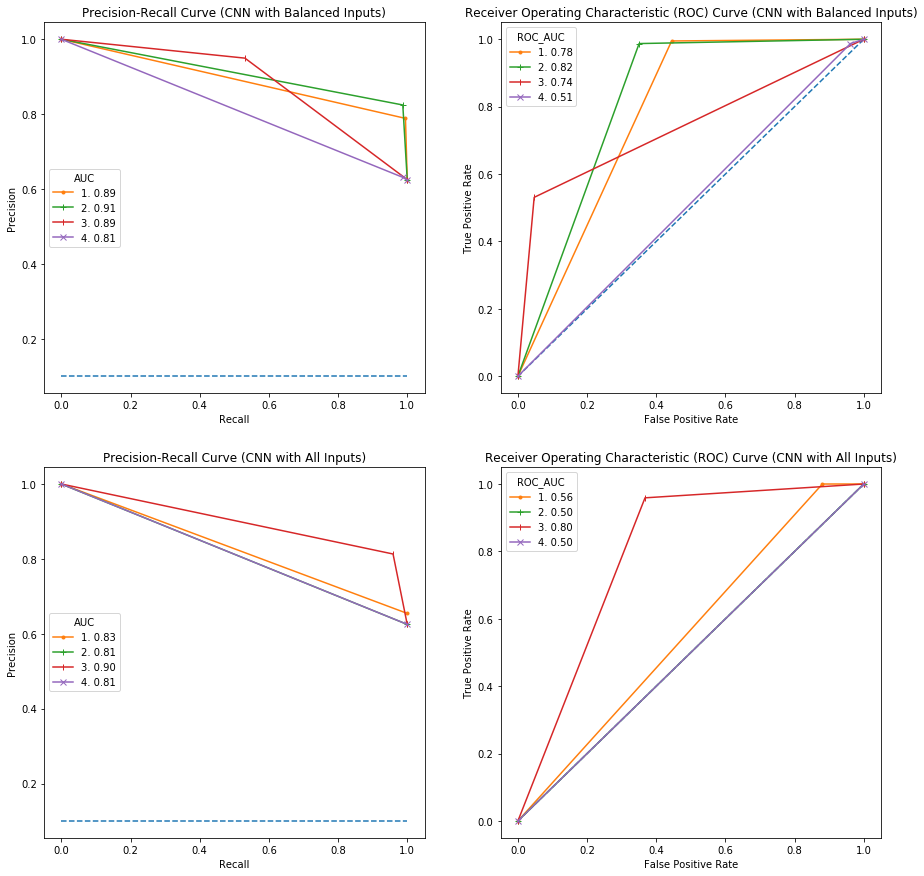

<Figure size 432x288 with 0 Axes>

In [55]:
%matplotlib inline

fig_1 = plt.figure(figsize=(15,15))
gs_1 = gridspec.GridSpec(2, 2)


ax1 = plt.subplot(gs_1[0, 0])
# plot no skill
ax1 = plt.title('Precision-Recall Curve (CNN with Balanced Inputs)')
ax1 = plt.plot([0, 1], [0.1, 0.1], linestyle='--')
# plot the precision-recall curve for the model
ax1 = plt.plot(metrics_balanced[0]['PRC_recall'], metrics_balanced[0]['PRC_precision'], marker='.', label='1. {:.2f}'.format(metrics_balanced[0]['AUC']))
ax1 = plt.plot(metrics_balanced[1]['PRC_recall'], metrics_balanced[1]['PRC_precision'], marker='+', label='2. {:.2f}'.format(metrics_balanced[1]['AUC']))
ax1 = plt.plot(metrics_balanced[2]['PRC_recall'], metrics_balanced[2]['PRC_precision'], marker='|', label='3. {:.2f}'.format(metrics_balanced[2]['AUC']))
ax1 = plt.plot(metrics_balanced[3]['PRC_recall'], metrics_balanced[3]['PRC_precision'], marker='x', label='4. {:.2f}'.format(metrics_balanced[3]['AUC']))
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(title='AUC')
# show the plot


ax2 = plt.subplot(gs_1[0, 1])
ax2 = plt.title('Receiver Operating Characteristic (ROC) Curve (CNN with Balanced Inputs)')
# plot no skill
ax2 = plt.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
ax2 = plt.plot(metrics_balanced[0]['fpr'], metrics_balanced[0]['tpr'], marker='.', label='1. {:.2f}'.format(metrics_balanced[0]['ROC_AUC']))
ax2 = plt.plot(metrics_balanced[1]['fpr'], metrics_balanced[1]['tpr'], marker='+', label='2. {:.2f}'.format(metrics_balanced[1]['ROC_AUC']))
ax2 = plt.plot(metrics_balanced[2]['fpr'], metrics_balanced[2]['tpr'], marker='|', label='3. {:.2f}'.format(metrics_balanced[2]['ROC_AUC']))
ax2 = plt.plot(metrics_balanced[3]['fpr'], metrics_balanced[3]['tpr'], marker='x', label='4. {:.2f}'.format(metrics_balanced[3]['ROC_AUC']))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(title='ROC_AUC')
# show the plot

ax3 = plt.subplot(gs_1[1, 0])
# plot no skill
ax3 = plt.title('Precision-Recall Curve (CNN with All Inputs)')
ax3 = plt.plot([0, 1], [0.1, 0.1], linestyle='--')
# plot the precision-recall curve for the model

ax3 = plt.plot(metrics_unbalanced[0]['PRC_recall'], metrics_unbalanced[0]['PRC_precision'], marker='.', label='1. {:.2f}'.format(metrics_unbalanced[0]['AUC']))
ax3 = plt.plot(metrics_unbalanced[1]['PRC_recall'], metrics_unbalanced[1]['PRC_precision'], marker='+', label='2. {:.2f}'.format(metrics_unbalanced[1]['AUC']))
ax3 = plt.plot(metrics_unbalanced[2]['PRC_recall'], metrics_unbalanced[2]['PRC_precision'], marker='|', label='3. {:.2f}'.format(metrics_unbalanced[2]['AUC']))
ax3 = plt.plot(metrics_unbalanced[3]['PRC_recall'], metrics_unbalanced[3]['PRC_precision'], marker='x', label='4. {:.2f}'.format(metrics_unbalanced[3]['AUC']))
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(title='AUC')
# show the plot


ax4 = plt.subplot(gs_1[1, 1])
ax4 = plt.title('Receiver Operating Characteristic (ROC) Curve (CNN with All Inputs)')
# plot no skill
ax4 = plt.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
ax4 = plt.plot(metrics_unbalanced[0]['fpr'], metrics_unbalanced[0]['tpr'], marker='.', label='1. {:.2f}'.format(metrics_unbalanced[0]['ROC_AUC']))
ax4 = plt.plot(metrics_unbalanced[1]['fpr'], metrics_unbalanced[1]['tpr'], marker='+', label='2. {:.2f}'.format(metrics_unbalanced[1]['ROC_AUC']))
ax4 = plt.plot(metrics_unbalanced[2]['fpr'], metrics_unbalanced[2]['tpr'], marker='|', label='3. {:.2f}'.format(metrics_unbalanced[2]['ROC_AUC']))
ax4 = plt.plot(metrics_unbalanced[3]['fpr'], metrics_unbalanced[3]['tpr'], marker='x', label='4. {:.2f}'.format(metrics_unbalanced[3]['ROC_AUC']))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(title='ROC_AUC')
# show the plot


plt.show()
plt.savefig('saved_models/model_performance_comparison.jpeg')
#shutil.copy('saved_models/model_performance.png', '/content/gdrive/My Drive/Colab_stuff/saved_models/')

Do the same for cases with Transfer Learning

In [56]:
#Load the Inception_V3 model
inception_base_model = inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape = (256, 256, 3))
 
# Freeze the layers which you don't want to train. Here I am freezing the first 5 layers.
for layer in inception_base_model.layers:
    layer.trainable = False

#Adding custom Layers 
x = inception_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
inception_predictions = Dense(2, activation="softmax")(x)


# creating the final model 
inception_model = Model(inputs = inception_base_model.input, outputs = inception_predictions)



87916544/87910968 [==============================] - 1s 0us/step


In [57]:
#Load the Xception model
Xception_base_model = xception.Xception(weights='imagenet', include_top=False, input_shape = (256, 256, 3))
 
# Freeze the layers which you don't want to train. Here I am freezing the first 5 layers.
for layer in Xception_base_model.layers:
    layer.trainable = False

#Adding custom Layers 
x = Xception_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
Xception_predictions = Dense(2, activation="softmax")(x)


# creating the final model 
Xception_model = Model(inputs = Xception_base_model.input, outputs = Xception_predictions)




83689472/83683744 [==============================] - 1s 0us/step


Load the best model (i.e. with the lowest validation loss) . Then get the metrics pertaining to the model.

In [77]:
transfer_model_unbalanced = [inception_model, Xception_model]
transfer_files_unbalanced = ['saved_models/inception_transfer_unbalanced.hdf5', 'saved_models/Xception_transfer_unbalanced.hdf5']
transfer_logger_unbalanced = ['saved_models/inception_unbal.log', 'saved_models/Xception_unbal.log']
metrics_transfer_unbalanced = [] 
for run in range(2):
  train, report = run_cnn_model(model=transfer_model_unbalanced[run],\
                                chkpoint_filepath=transfer_files_unbalanced[run],\
                                csv_filepath=transfer_logger_unbalanced[run],\
                                tr_tensors=train_tensors, tr_targets=train_targets,\
                                v_tensors=valid_tensors, v_targets=valid_targets,\
                                te_tensors=test_tensors,te_targets=test_targets,\
                                batch=64, epochs=60, es_patience=15\
                                )
  shutil.copy(transfer_files_unbalanced[run], '/content/gdrive/My Drive/Colab_stuff/saved_models/')
  shutil.copy(transfer_logger_unbalanced[run], '/content/gdrive/My Drive/Colab_stuff/saved_models/')
  metrics_transfer_unbalanced.append(report)
  
  

Epoch 1/60
82/81 [==============================] - 73s 892ms/step - loss: 0.4546 - acc: 0.7856 - val_loss: 0.9506 - val_acc: 0.5000
Epoch 2/60
82/81 [==============================] - 55s 668ms/step - loss: 0.3255 - acc: 0.8571 - val_loss: 0.7279 - val_acc: 0.6250
Epoch 3/60
82/81 [==============================] - 64s 782ms/step - loss: 0.2936 - acc: 0.8720 - val_loss: 1.2183 - val_acc: 0.5000
Epoch 4/60
82/81 [==============================] - 65s 791ms/step - loss: 0.2711 - acc: 0.8841 - val_loss: 1.2392 - val_acc: 0.5000
Epoch 5/60
82/81 [==============================] - 63s 773ms/step - loss: 0.2753 - acc: 0.8843 - val_loss: 1.3960 - val_acc: 0.5000
Epoch 6/60
82/81 [==============================] - 63s 773ms/step - loss: 0.2565 - acc: 0.8994 - val_loss: 0.6774 - val_acc: 0.6875
Epoch 7/60
82/81 [==============================] - 62s 756ms/step - loss: 0.2443 - acc: 0.8986 - val_loss: 0.8602 - val_acc: 0.6250
Epoch 8/60
82/81 [==============================] - 65s 792ms/step - 

In [78]:
transfer_model_balanced = [inception_model, Xception_model]
transfer_files_balanced = ['saved_models/inception_transfer_balanced.hdf5', 'saved_models/Xception_transfer_balanced.hdf5']
transfer_logger_balanced = ['saved_models/inception_bal.log', 'saved_models/Xception_bal.log']
metrics_transfer_balanced = [] 
for run in range(2):
  train, report = run_cnn_model(model=transfer_model_balanced[run],\
                                chkpoint_filepath=transfer_files_balanced[run],\
                                csv_filepath=transfer_logger_balanced[run],\
                                tr_tensors=train_tensors_rebalanced, tr_targets=train_targets_rebalanced_OHE,\
                                v_tensors=valid_tensors, v_targets=valid_targets,\
                                te_tensors=test_tensors,te_targets=test_targets,\
                                batch=64, epochs=60, es_patience=15\
                                )
  shutil.copy(transfer_files_balanced[run], '/content/gdrive/My Drive/Colab_stuff/saved_models/')
  shutil.copy(transfer_logger_balanced[run], '/content/gdrive/My Drive/Colab_stuff/saved_models/')
  metrics_transfer_balanced.append(report)

Epoch 1/60
42/41 [==============================] - 40s 947ms/step - loss: 0.2484 - acc: 0.9020 - val_loss: 0.6784 - val_acc: 0.6875
Epoch 2/60
42/41 [==============================] - 28s 659ms/step - loss: 0.2636 - acc: 0.8975 - val_loss: 0.6224 - val_acc: 0.7500
Epoch 3/60
42/41 [==============================] - 31s 750ms/step - loss: 0.2564 - acc: 0.8996 - val_loss: 1.1646 - val_acc: 0.5000
Epoch 4/60
42/41 [==============================] - 33s 789ms/step - loss: 0.2502 - acc: 0.8975 - val_loss: 0.8864 - val_acc: 0.6250
Epoch 5/60
42/41 [==============================] - 33s 796ms/step - loss: 0.2406 - acc: 0.9056 - val_loss: 0.8347 - val_acc: 0.6250
Epoch 6/60
42/41 [==============================] - 33s 780ms/step - loss: 0.2326 - acc: 0.9059 - val_loss: 0.6317 - val_acc: 0.8125
Epoch 7/60
42/41 [==============================] - 32s 773ms/step - loss: 0.2495 - acc: 0.8990 - val_loss: 1.3724 - val_acc: 0.5000
Epoch 8/60
42/41 [==============================] - 32s 753ms/step - 

In [0]:
transfer_model = [inception_model, Xception_model]
metrics_transfer_unbalanced=[]
metrics_transfer_balanced = []

for i in range(2):
  transfer_model[i].load_weights(transfer_files_unbalanced[i])
  metrics_transfer_unbalanced.append(report_metrics(cnn_model[i],test_tensors,test_targets))                    
  transfer_model[i].load_weights(transfer_files_balanced[i])
  metrics_transfer_balanced.append(report_metrics(cnn_model[i],test_tensors,test_targets))

Get the predictions based on the model and check the accuracy metrics

Plot the metrics for all the models together to compare the Performance

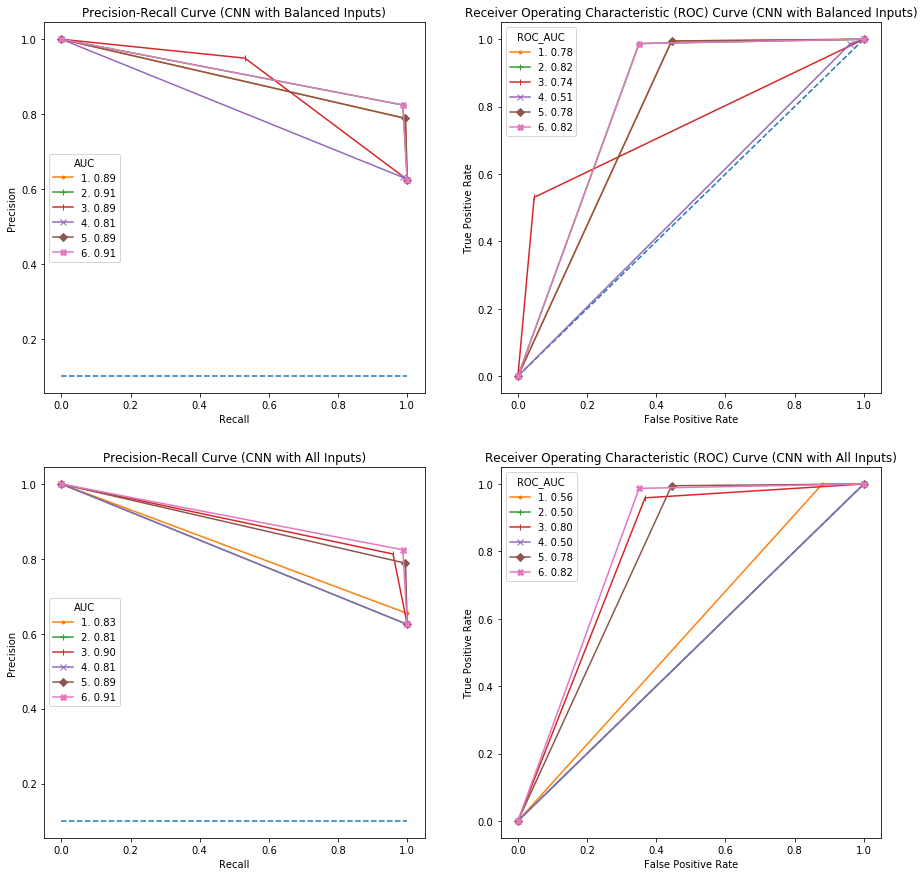

'/content/gdrive/My Drive/Colab_stuff/saved_models/model_performance_comparison_all.jpeg'

<Figure size 432x288 with 0 Axes>

In [59]:
%matplotlib inline

fig_1 = plt.figure(figsize=(15,15))
gs_xx = gridspec.GridSpec(2, 2)


ax1 = plt.subplot(gs_xx[0, 0])
# plot no skill
ax1 = plt.title('Precision-Recall Curve (CNN with Balanced Inputs)')
ax1 = plt.plot([0, 1], [0.1, 0.1], linestyle='--')
# plot the precision-recall curve for the model
ax1 = plt.plot(metrics_balanced[0]['PRC_recall'], metrics_balanced[0]['PRC_precision'], marker='.', label='1. {:.2f}'.format(metrics_balanced[0]['AUC']))
ax1 = plt.plot(metrics_balanced[1]['PRC_recall'], metrics_balanced[1]['PRC_precision'], marker='+', label='2. {:.2f}'.format(metrics_balanced[1]['AUC']))
ax1 = plt.plot(metrics_balanced[2]['PRC_recall'], metrics_balanced[2]['PRC_precision'], marker='|', label='3. {:.2f}'.format(metrics_balanced[2]['AUC']))
ax1 = plt.plot(metrics_balanced[3]['PRC_recall'], metrics_balanced[3]['PRC_precision'], marker='x', label='4. {:.2f}'.format(metrics_balanced[3]['AUC']))
ax1 = plt.plot(metrics_transfer_balanced[0]['PRC_recall'], metrics_transfer_balanced[0]['PRC_precision'], marker='D', label='5. {:.2f}'.format(metrics_transfer_balanced[0]['AUC']))
ax1 = plt.plot(metrics_transfer_balanced[1]['PRC_recall'], metrics_transfer_balanced[1]['PRC_precision'], marker='X', label='6. {:.2f}'.format(metrics_transfer_balanced[1]['AUC']))
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(title='AUC')
# show the plot


ax2 = plt.subplot(gs_xx[0, 1])
ax2 = plt.title('Receiver Operating Characteristic (ROC) Curve (CNN with Balanced Inputs)')
# plot no skill
ax2 = plt.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
ax2 = plt.plot(metrics_balanced[0]['fpr'], metrics_balanced[0]['tpr'], marker='.', label='1. {:.2f}'.format(metrics_balanced[0]['ROC_AUC']))
ax2 = plt.plot(metrics_balanced[1]['fpr'], metrics_balanced[1]['tpr'], marker='+', label='2. {:.2f}'.format(metrics_balanced[1]['ROC_AUC']))
ax2 = plt.plot(metrics_balanced[2]['fpr'], metrics_balanced[2]['tpr'], marker='|', label='3. {:.2f}'.format(metrics_balanced[2]['ROC_AUC']))
ax2 = plt.plot(metrics_balanced[3]['fpr'], metrics_balanced[3]['tpr'], marker='x', label='4. {:.2f}'.format(metrics_balanced[3]['ROC_AUC']))
ax2 = plt.plot(metrics_transfer_balanced[0]['fpr'], metrics_transfer_balanced[0]['tpr'], marker='D', label='5. {:.2f}'.format(metrics_transfer_balanced[0]['ROC_AUC']))
ax2 = plt.plot(metrics_transfer_balanced[1]['fpr'], metrics_transfer_balanced[1]['tpr'], marker='X', label='6. {:.2f}'.format(metrics_transfer_balanced[1]['ROC_AUC']))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(title='ROC_AUC')
# show the plot

ax3 = plt.subplot(gs_xx[1, 0])
# plot no skill
ax3 = plt.title('Precision-Recall Curve (CNN with All Inputs)')
ax3 = plt.plot([0, 1], [0.1, 0.1], linestyle='--')
# plot the precision-recall curve for the model

ax3 = plt.plot(metrics_unbalanced[0]['PRC_recall'], metrics_unbalanced[0]['PRC_precision'], marker='.', label='1. {:.2f}'.format(metrics_unbalanced[0]['AUC']))
ax3 = plt.plot(metrics_unbalanced[1]['PRC_recall'], metrics_unbalanced[1]['PRC_precision'], marker='+', label='2. {:.2f}'.format(metrics_unbalanced[1]['AUC']))
ax3 = plt.plot(metrics_unbalanced[2]['PRC_recall'], metrics_unbalanced[2]['PRC_precision'], marker='|', label='3. {:.2f}'.format(metrics_unbalanced[2]['AUC']))
ax3 = plt.plot(metrics_unbalanced[3]['PRC_recall'], metrics_unbalanced[3]['PRC_precision'], marker='x', label='4. {:.2f}'.format(metrics_unbalanced[3]['AUC']))
ax3 = plt.plot(metrics_transfer_unbalanced[0]['PRC_recall'], metrics_transfer_unbalanced[0]['PRC_precision'], marker='D', label='5. {:.2f}'.format(metrics_transfer_unbalanced[0]['AUC']))
ax3 = plt.plot(metrics_transfer_unbalanced[1]['PRC_recall'], metrics_transfer_unbalanced[1]['PRC_precision'], marker='X', label='6. {:.2f}'.format(metrics_transfer_unbalanced[1]['AUC']))
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(title='AUC')
# show the plot


ax4 = plt.subplot(gs_xx[1, 1])
ax4 = plt.title('Receiver Operating Characteristic (ROC) Curve (CNN with All Inputs)')
# plot no skill
ax4 = plt.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
ax4 = plt.plot(metrics_unbalanced[0]['fpr'], metrics_unbalanced[0]['tpr'], marker='.', label='1. {:.2f}'.format(metrics_unbalanced[0]['ROC_AUC']))
ax4 = plt.plot(metrics_unbalanced[1]['fpr'], metrics_unbalanced[1]['tpr'], marker='+', label='2. {:.2f}'.format(metrics_unbalanced[1]['ROC_AUC']))
ax4 = plt.plot(metrics_unbalanced[2]['fpr'], metrics_unbalanced[2]['tpr'], marker='|', label='3. {:.2f}'.format(metrics_unbalanced[2]['ROC_AUC']))
ax4 = plt.plot(metrics_unbalanced[3]['fpr'], metrics_unbalanced[3]['tpr'], marker='x', label='4. {:.2f}'.format(metrics_unbalanced[3]['ROC_AUC']))
ax4 = plt.plot(metrics_transfer_unbalanced[0]['fpr'], metrics_transfer_unbalanced[0]['tpr'], marker='D', label='5. {:.2f}'.format(metrics_transfer_unbalanced[0]['ROC_AUC']))
ax4 = plt.plot(metrics_transfer_unbalanced[1]['fpr'], metrics_transfer_unbalanced[1]['tpr'], marker='X', label='6. {:.2f}'.format(metrics_transfer_unbalanced[1]['ROC_AUC']))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(title='ROC_AUC')
# show the plot


plt.show()
plt.savefig('saved_models/model_performance_comparison_all.jpeg')
shutil.copy('saved_models/model_performance_comparison_all.jpeg', '/content/gdrive/My Drive/Colab_stuff/saved_models/')

Create a dataframe to track the training performance to be able to visualize them

In [0]:
df_log_unbalanced = []
df_log_balanced = []
df_transfer_log_unbalanced = []
df_transfer_log_balanced = []

for i in range(4):
  df_log_unbalanced.append(pd.read_csv(logger_unbalanced[i], sep=','))
  df_log_balanced.append(pd.read_csv(logger_balanced[i], sep=','))

for i in range(2):
  df_transfer_log_unbalanced.append(pd.read_csv(transfer_logger_unbalanced[i], sep=','))
  df_transfer_log_balanced.append(pd.read_csv(transfer_logger_balanced[i], sep=','))
  

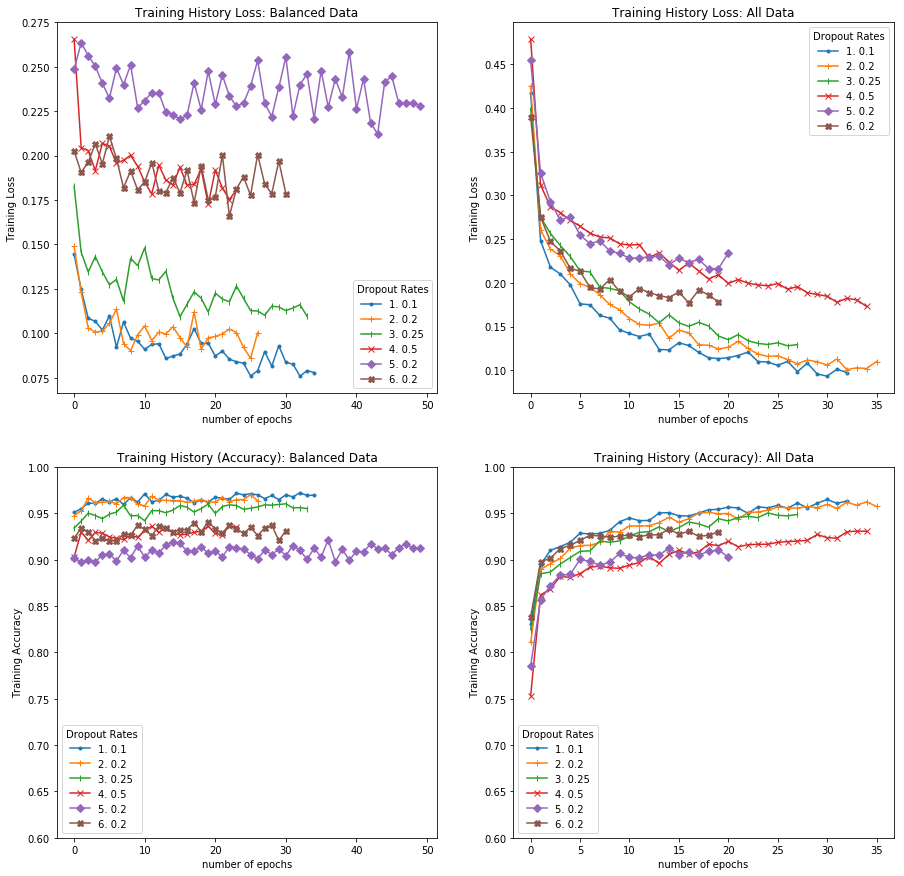

In [62]:
%matplotlib inline

fig_train = plt.figure(figsize=(15,15))
gs_2 = gridspec.GridSpec(2, 2)


ax1 = plt.subplot(gs_2[0, 0])
ax1 = plt.title('Training History Loss: Balanced Data')
ax1 = plt.plot(df_log_balanced[0]['loss'], marker='.', label='1. 0.1')
ax1 = plt.plot(df_log_balanced[1]['loss'], marker='+', label='2. 0.2')
ax1 = plt.plot(df_log_balanced[2]['loss'], marker='|', label='3. 0.25')
ax1 = plt.plot(df_log_balanced[3]['loss'], marker='x', label='4. 0.5')
ax1 = plt.plot(df_transfer_log_balanced[0]['loss'], marker='D', label='5. 0.2')
ax1 = plt.plot(df_transfer_log_balanced[1]['loss'], marker='X', label='6. 0.2')
plt.ylabel('Training Loss')
plt.xlabel('number of epochs')
plt.legend(title='Dropout Rates')
# show the plot


ax2 = plt.subplot(gs_2[0, 1])
ax2 = plt.title('Training History Loss: All Data')
ax2 = plt.plot(df_log_unbalanced[0]['loss'], marker='.', label='1. 0.1')
ax2 = plt.plot(df_log_unbalanced[1]['loss'], marker='+', label='2. 0.2')
ax2 = plt.plot(df_log_unbalanced[2]['loss'], marker='|', label='3. 0.25')
ax2 = plt.plot(df_log_unbalanced[3]['loss'], marker='x', label='4. 0.5')
ax2 = plt.plot(df_transfer_log_unbalanced[0]['loss'], marker='D', label='5. 0.2')
ax2 = plt.plot(df_transfer_log_unbalanced[1]['loss'], marker='X', label='6. 0.2')
plt.ylabel('Training Loss')
plt.xlabel('number of epochs')
plt.legend(title='Dropout Rates')
# show the plot



ax3 = plt.subplot(gs_2[1, 0])
ax3 = plt.title('Training History (Accuracy): Balanced Data')
ax3 = plt.plot(df_log_balanced[0]['acc'], marker='.', label='1. 0.1')
ax3 = plt.plot(df_log_balanced[1]['acc'], marker='+', label='2. 0.2')
ax3 = plt.plot(df_log_balanced[2]['acc'], marker='|', label='3. 0.25')
ax3 = plt.plot(df_log_balanced[3]['acc'], marker='x', label='4. 0.5')
ax3 = plt.plot(df_transfer_log_balanced[0]['acc'], marker='D', label='5. 0.2')
ax3 = plt.plot(df_transfer_log_balanced[1]['acc'], marker='X', label='6. 0.2')
plt.ylabel('Training Accuracy')
plt.xlabel('number of epochs')
ax3 = plt.ylim([0.6,1])
plt.legend(title='Dropout Rates')
# show the plot


ax4 = plt.subplot(gs_2[1, 1])
ax4 = plt.title('Training History (Accuracy): All Data')
ax4 = plt.plot(df_log_unbalanced[0]['acc'], marker='.', label='1. 0.1')
ax4 = plt.plot(df_log_unbalanced[1]['acc'], marker='+', label='2. 0.2')
ax4 = plt.plot(df_log_unbalanced[2]['acc'], marker='|', label='3. 0.25')
ax4 = plt.plot(df_log_unbalanced[3]['acc'], marker='x', label='4. 0.5')
ax4 = plt.plot(df_transfer_log_unbalanced[0]['acc'], marker='D', label='5. 0.2')
ax4 = plt.plot(df_transfer_log_unbalanced[1]['acc'], marker='X', label='6. 0.2')
plt.ylabel('Training Accuracy')
plt.xlabel('number of epochs')
ax4 = plt.ylim([0.6,1])
plt.legend(title='Dropout Rates')
# show the plot
plt.show()

In [0]:
list_of_reports = metrics_unbalanced + metrics_balanced + metrics_transfer_unbalanced + metrics_transfer_balanced
df_metrics_reports = pd.DataFrame(list_of_reports,  \
                          index=['unbal_drop_0.1', 'unbal_drop_0.2', 'unbal_drop_0.25','unbal_drop_0.5',\
                                 'bal_drop_0.1', 'bal_drop_0.2', 'bal_drop_0.25', 'bal_drop_0.5',\
                                 'unbal_inception_drop_0.2', 'unbal_xception_drop_0.2',\
                                 'bal_inception_drop_0.2', 'bal_xception_drop_0.2'\
                                ])

df_metrics_relevant = df_metrics_reports.drop(['ROC_thresholds','PRC_precision', 'PRC_recall', 'PRC_thresholds', 'fpr','tpr' ], axis=1)

In [64]:
df_metrics_relevant.sort_values(by= ['kappa_score', 'recall', 'precision', 'AUC'],ascending=False)

AUC   ROC_AUC  ...  precision    recall
bal_drop_0.2              0.909802  0.818376  ...   0.824411  0.987179
unbal_xception_drop_0.2   0.909802  0.818376  ...   0.824411  0.987179
bal_xception_drop_0.2     0.909802  0.818376  ...   0.824411  0.987179
unbal_drop_0.25           0.898829  0.795726  ...   0.813043  0.958974
bal_drop_0.1              0.893347  0.775214  ...   0.788618  0.994872
unbal_inception_drop_0.2  0.893347  0.775214  ...   0.788618  0.994872
bal_inception_drop_0.2    0.893347  0.775214  ...   0.788618  0.994872
bal_drop_0.25             0.886790  0.741880  ...   0.949541  0.530769
unbal_drop_0.1            0.827181  0.559829  ...   0.654362  1.000000
bal_drop_0.5              0.813170  0.512821  ...   0.631148  0.987179
unbal_drop_0.2            0.812500  0.500000  ...   0.625000  1.000000
unbal_drop_0.5            0.812500  0.500000  ...   0.625000  1.000000

[12 rows x 9 columns]

# Visualization of the CNN for a sample image

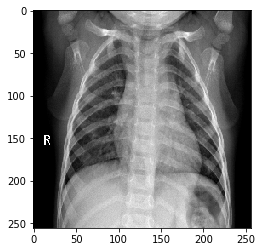

(1, 256, 256, 3)
Actual Class: /content/chest_xray/train/NORMAL/IM-0313-0001.jpeg
Predicted class: [0]


In [83]:
sample = np.random.randint(0,2682)
img_path = np.squeeze(train_files_rebalanced,axis=None)[sample]
img = image.load_img(img_path, target_size = (256,256))

img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0).astype(float)/255
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)
print('Actual Class: {}'.format(np.squeeze(train_files,axis=None)[sample]))
p_class = cnn_model[1].predict_classes(np.vstack([img_tensor]), batch_size=10)
print('Predicted class: {}'.format(p_class))

In [0]:
layer_outputs = [layer.output for layer in cnn_model[1].layers[:12]] # Extracts the outputs of the top 12 layers
activation_model = Model(inputs=cnn_model[1].input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input
activations = activation_model.predict(img_tensor) # Returns a list of five Numpy arrays: one array per layer activation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide


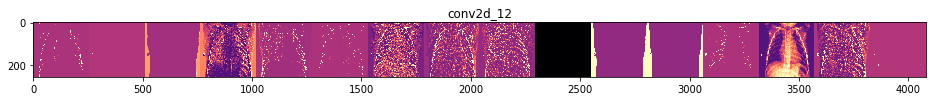

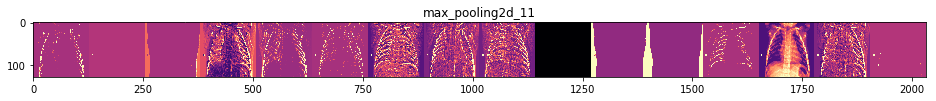

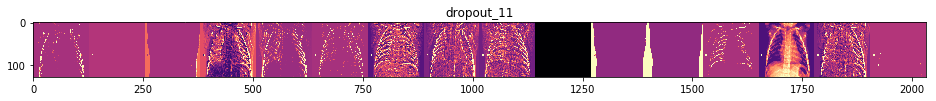

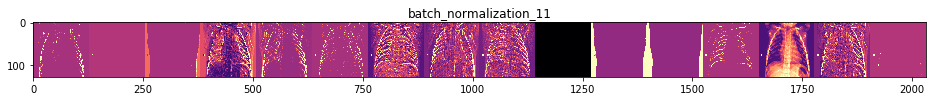

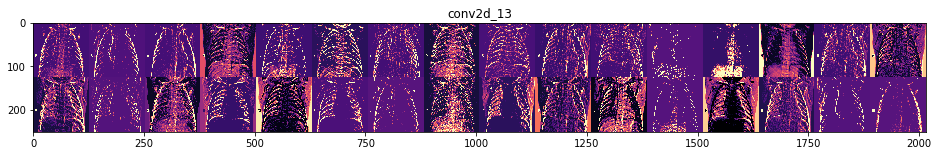

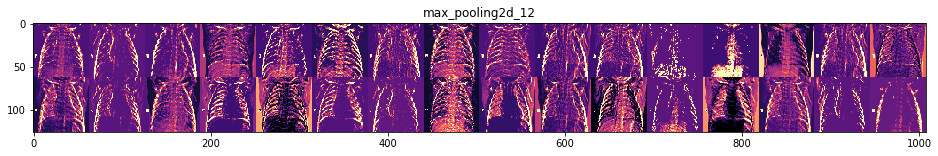

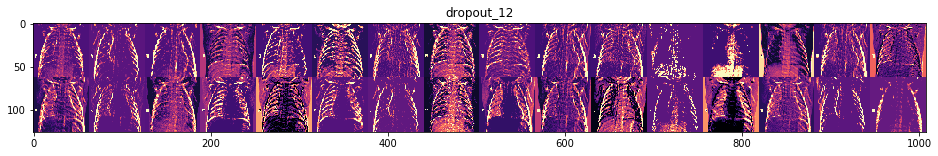

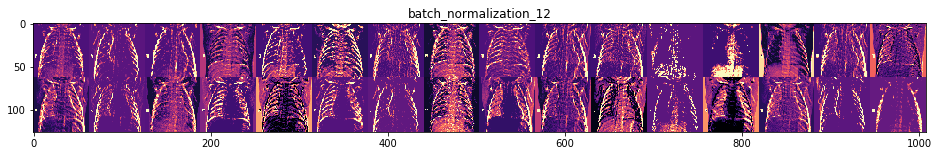

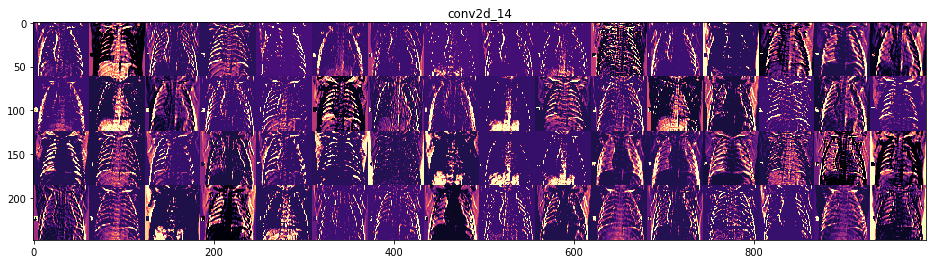

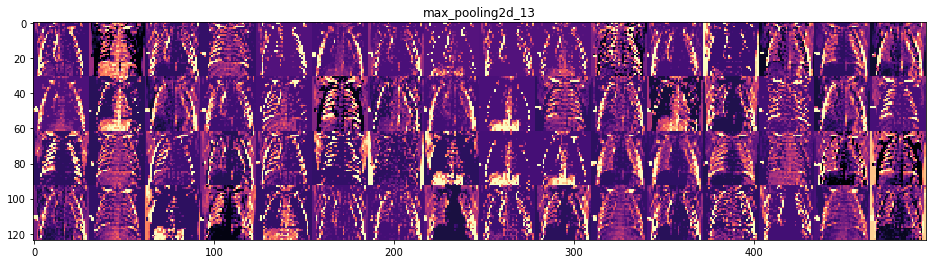

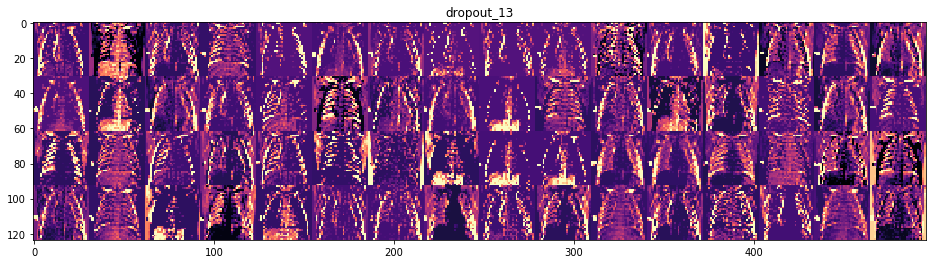

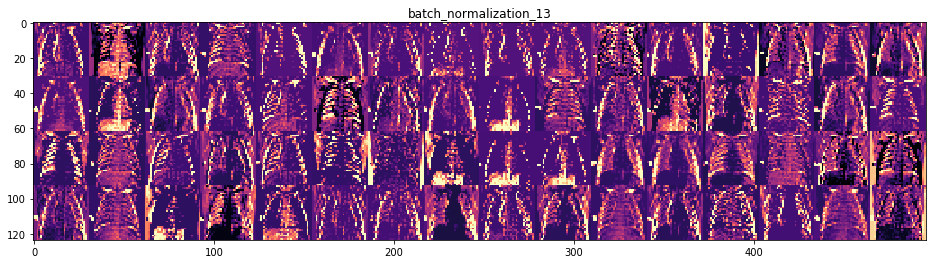

In [85]:
layer_names = []
for layer in cnn_model[1].layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='magma')